In [1]:
# import libraries
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [2]:
heart = pd.read_csv('data/heart.csv')

In [3]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Data cleaning and preprocessing

# check if there are any Null values
heart.isnull().sum().sort_values(ascending=False).head(11)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
dtype: int64

In [5]:
# check duplicated values
heart.duplicated().sum()

1

In [6]:
# drop duplicated values
heart.drop_duplicates(keep='first',inplace=True)

In [7]:
# getting the statistical summary of dataset
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

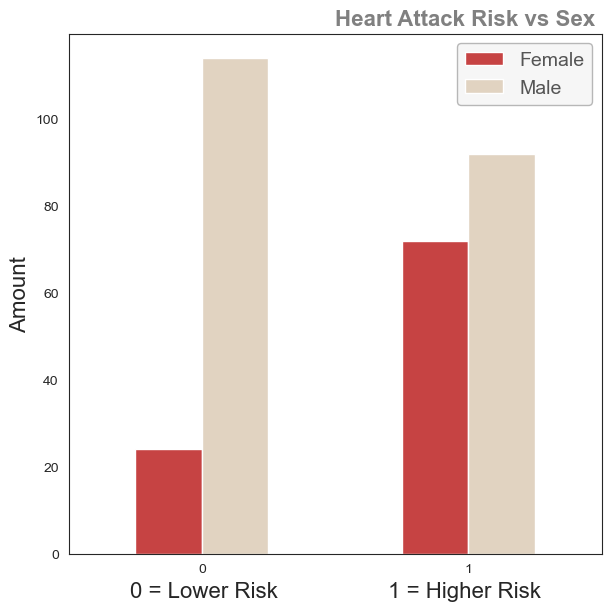

In [8]:
# Compare Heart Attack vs Sex 
df = pd.crosstab(heart['output'],heart['sex'])
sns.set_style("white")

df.plot(kind="bar",
        figsize=(6,6),
        color=['#c64343', '#e1d3c1']);

plt.title("Heart Attack Risk vs Sex ", fontsize=16)
plt.xlabel("0 = Lower Risk                  1 = Higher Risk", fontsize=16)
plt.ylabel("Amount", fontsize=16)
plt.legend(["Female","Male"], fontsize=14)
plt.xticks(rotation=0)

In [9]:
fig = px.pie(heart,
            names= "sex",
            template= "presentation",
            hole= 0.6,
            color_discrete_sequence=['#e1d3c1', '#c64343']
            #color_discrete_sequence=px.colors.sequential.RdBu
            )

# layout
fig.update_layout(title_text='Gender Distribution',
                  title_x=0.5,
                  font=dict( size=18),
                  autosize=False,
                  width=500,
                  height=500,
                  showlegend=False)

fig.add_annotation(dict(x=0.5, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<span style='font-size: 26px; color=#555; font-family:Arial'>Gender<br></span>"))

fig.update_traces(textposition='outside',  textinfo='percent+label', rotation=20)
fig.show()

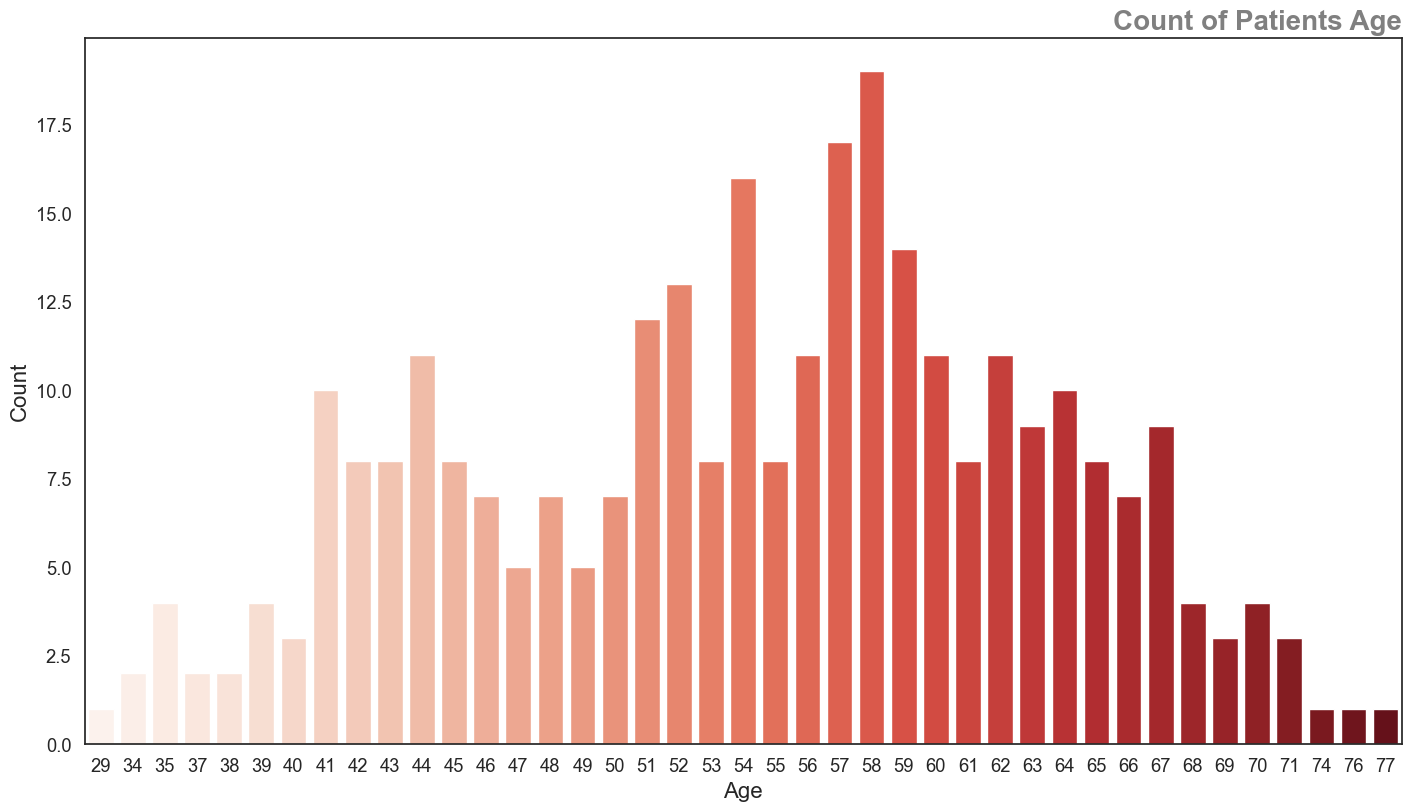

In [10]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style("white")

sns.countplot(x=heart["age"],
              palette='Reds')


plt.title("Count of Patients Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.show()

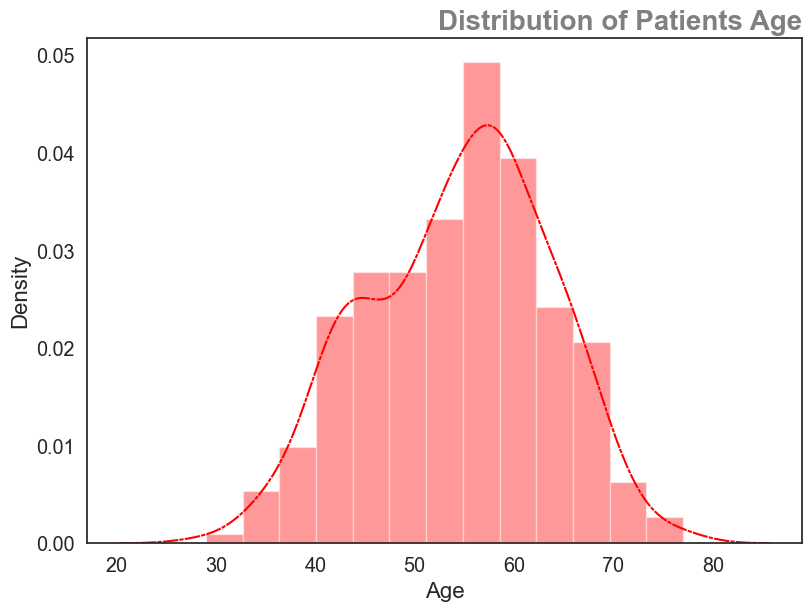

In [11]:
# age based analysis
sns.set(font_scale=1.3)

plt.figure(figsize=(8,6))
sns.set_style("white")
sns.distplot(heart['age'],
             color='red',
             kde=True)


plt.title("Distribution of Patients Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Density",fontsize=16)
plt.show()

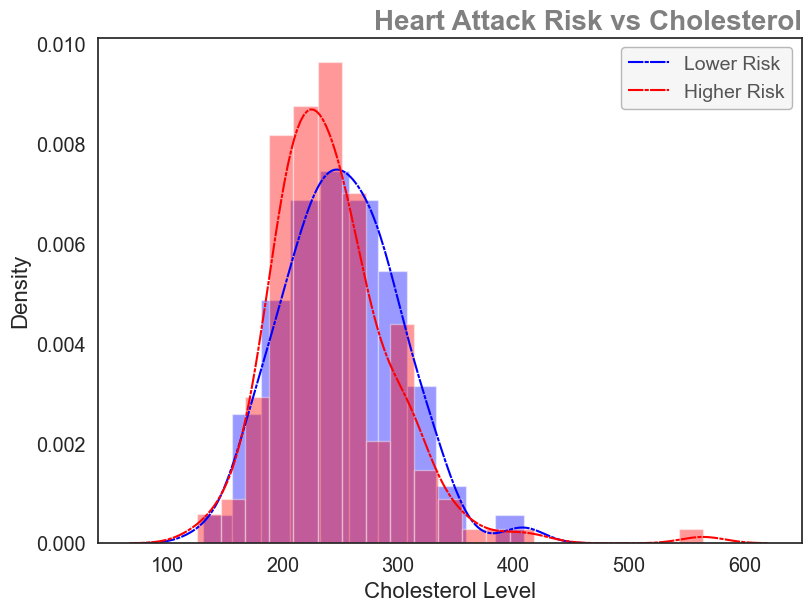

In [12]:
# Attack vs Cholesterol analysis
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
sns.set_style("white")

sns.distplot(heart[heart["output"]==0]["chol"],
             color="blue")
sns.distplot(heart[heart["output"]==1]["chol"],
             color="red")

plt.title("Heart Attack Risk vs Cholesterol", size=20)
plt.xlabel("Cholesterol Level", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.legend(["Lower Risk","Higher Risk"], fontsize=14)
plt.show()

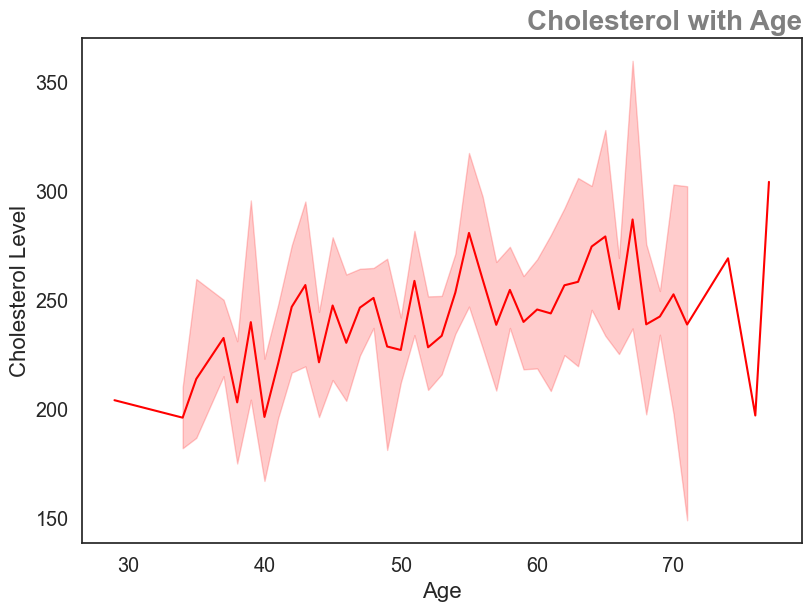

In [13]:
plt.figure(figsize=(8,6))

sns.lineplot(y="chol",
             x="age",
             data=heart,
             color="red")
plt.title("Cholesterol with Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Cholesterol Level",fontsize=16)
plt.show()

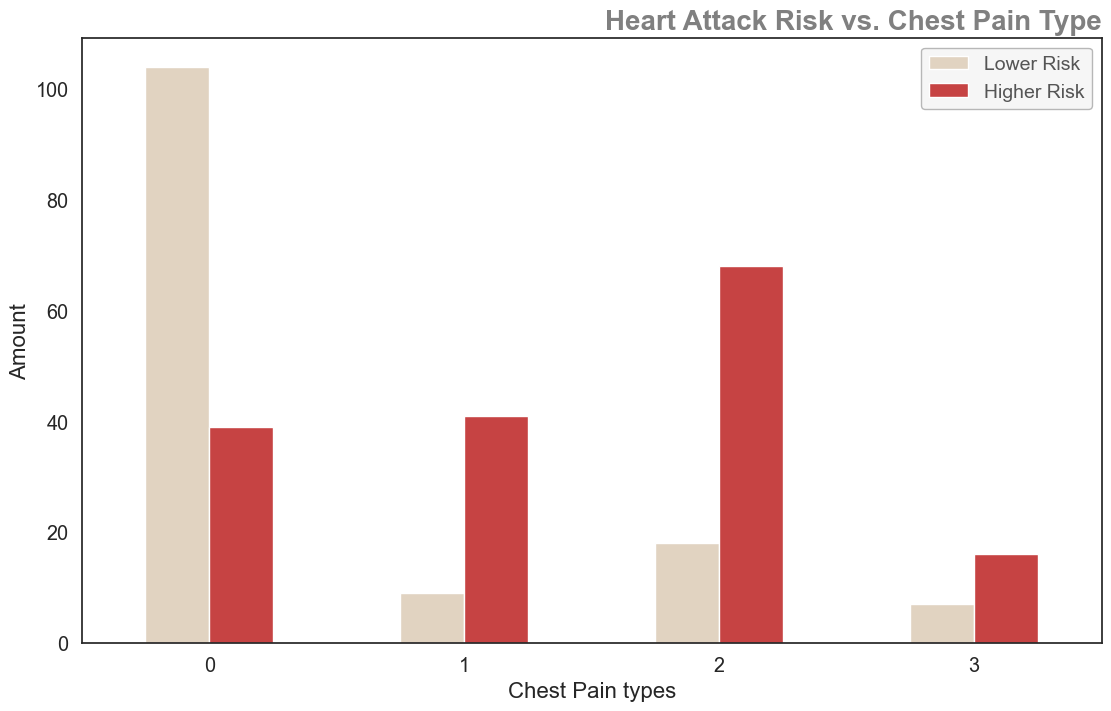

In [14]:
# Relation of Heart Attack with Chest Pain Type
df = pd.crosstab(heart['cp'], heart['output'])


# Make the crosstab more visual
sns.set(font_scale=1.3)
sns.set_style("white")

df.plot(kind='bar',
        figsize=(11,7),
        color=['#e1d3c1', '#c64343']);

plt.title("Heart Attack Risk vs. Chest Pain Type", fontsize=20)
plt.xlabel("Chest Pain types", fontsize=16)
plt.ylabel("Amount", fontsize=16)
plt.legend(['Lower Risk','Higher Risk'], fontsize=14)
plt.xticks(rotation=0);

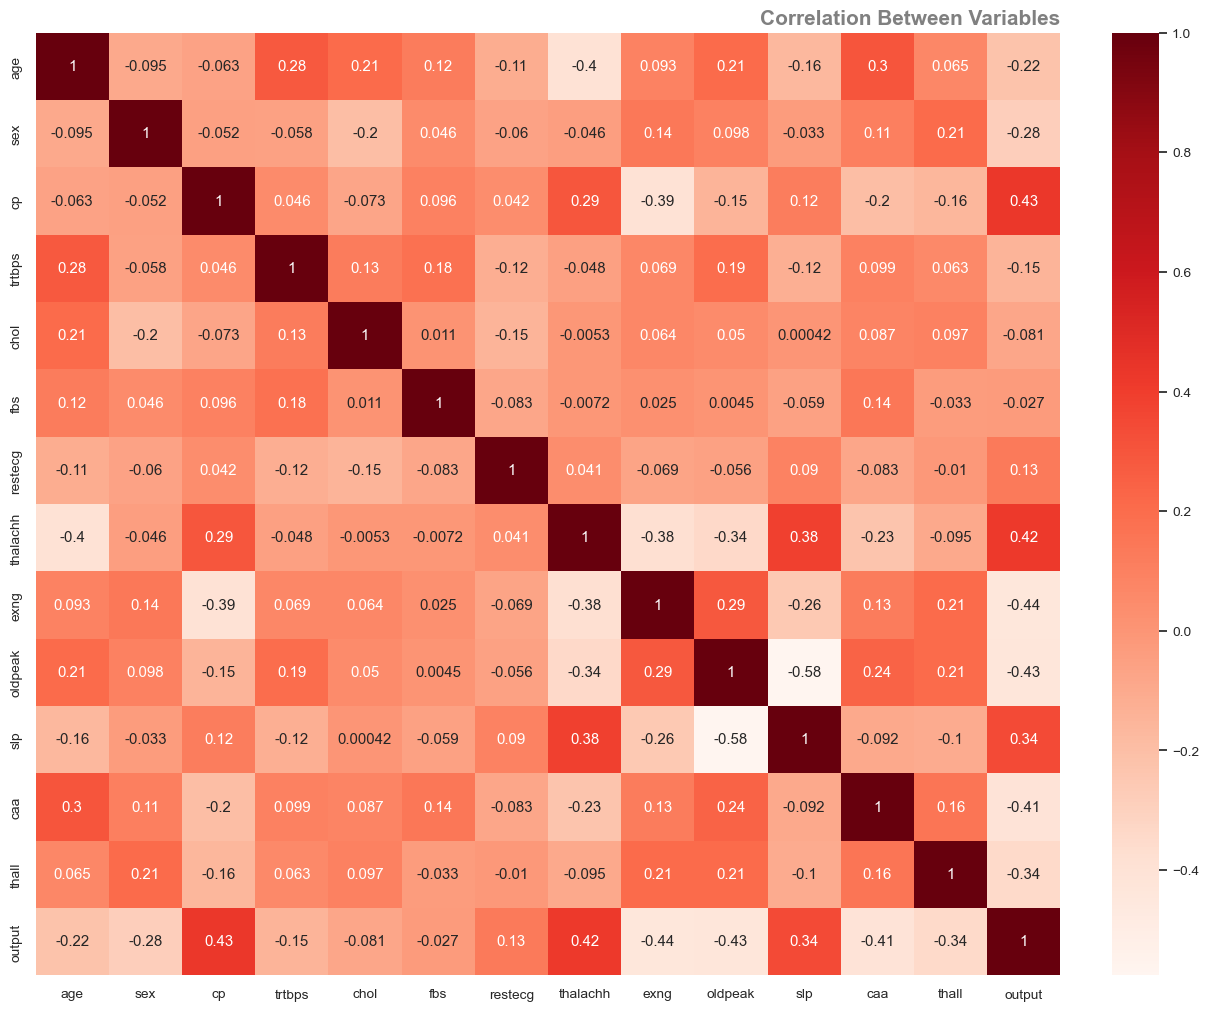

In [15]:
plt.figure(figsize=(12,10))
sns.set(font_scale=0.9)

sns.heatmap(heart.corr(),
            annot=True,
            cmap='Reds')

plt.title("Correlation Between Variables", size=15)
plt.show()